In [1]:
import pymysql
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scikit_posthocs as sp
import scipy.stats as stats
import csv

from statsmodels.stats.multicomp import MultiComparison

In [2]:
con = pymysql.connect(host="localhost", user="gabic", passwd="1234", db="doenca_renal_cronica")
con.select_db('doenca_renal_cronica')
cursor = con.cursor()  
cursor.connection.autocommit(True)

In [3]:
#criando os dataframes por tabela 
dados_consulta = pd.read_sql('SELECT * FROM doenca_renal_cronica.dados_consulta',con=con)
cidade = pd.read_sql('SELECT * FROM doenca_renal_cronica.cidade',con=con)
ubs = pd.read_sql('SELECT * FROM doenca_renal_cronica.ubs',con=con)
aval_funcao_renal = pd.read_sql('SELECT * FROM doenca_renal_cronica.aval_funcao_renal',con=con)
consulta_has = pd.read_sql('SELECT * FROM doenca_renal_cronica.consulta_has',con=con)
consulta_drc = pd.read_sql('SELECT * FROM doenca_renal_cronica.consulta_drc',con=con)
consulta_dm = pd.read_sql('SELECT * FROM doenca_renal_cronica.consulta_dm',con=con)
calculo_tfg = pd.read_sql('SELECT * FROM doenca_renal_cronica.calculo_tfg',con=con)
preparacao_trs = pd.read_sql('SELECT * FROM doenca_renal_cronica.preparacao_trs',con=con)
raca = pd.read_sql('SELECT * FROM doenca_renal_cronica.raca',con=con)
instrucao = pd.read_sql('SELECT * FROM doenca_renal_cronica.instrucao',con=con)
paciente = pd.read_sql('SELECT * FROM doenca_renal_cronica.paciente',con=con)
exame_fisico = pd.read_sql('SELECT * FROM doenca_renal_cronica.exame_fisico',con=con)
avaliacao_tratamento = pd.read_sql('SELECT * FROM doenca_renal_cronica.avaliacao_tratamento',con=con)
medicamento = pd.read_sql('SELECT * FROM doenca_renal_cronica.medicamento',con=con)
complicacao_funcao_renal = pd.read_sql('SELECT * FROM doenca_renal_cronica.complicacao_funcao_renal',con=con)

#dicionario com todas tabelas
dic = {'dados_consulta':dados_consulta,'cidade':cidade,'ubs':ubs,'aval_funcao_renal':aval_funcao_renal,
       'consulta_has':consulta_has,'consulta_drc':consulta_drc,'consulta_dm':consulta_dm,'calculo_tfg':calculo_tfg,
       'preparacao_trs':preparacao_trs,'raca':raca,'instrucao':instrucao,'paciente':paciente,'exame_fisico':exame_fisico,
       'avaliacao_tratamento':avaliacao_tratamento,'medicamento':medicamento,'complicacao_funcao_renal':complicacao_funcao_renal
      }

In [4]:
#separando apenas as colunas com números

df_num_dados_consulta = dados_consulta.select_dtypes(include = ['float64', 'int64'])
df_num_cidade = cidade.select_dtypes(include = ['float64', 'int64'])
df_num_ubs = ubs.select_dtypes(include = ['float64', 'int64'])
df_num_aval_funcao_renal = aval_funcao_renal.select_dtypes(include = ['float64', 'int64'])
df_num_consulta_has = consulta_has.select_dtypes(include = ['float64', 'int64'])
df_num_consulta_drc = consulta_drc.select_dtypes(include = ['float64', 'int64'])
df_num_consulta_dm = consulta_dm.select_dtypes(include = ['float64', 'int64'])
df_num_calculo_tfg = calculo_tfg.select_dtypes(include = ['float64', 'int64'])
df_num_preparacao_trs = preparacao_trs.select_dtypes(include = ['float64', 'int64'])
df_num_raca = raca.select_dtypes(include = ['float64', 'int64'])
df_num_instrucao = instrucao.select_dtypes(include = ['float64', 'int64'])
df_num_paciente = paciente.select_dtypes(include = ['float64', 'int64'])
df_num_exame_fisico = exame_fisico.select_dtypes(include = ['float64', 'int64'])
df_num_avaliacao_tratamento = avaliacao_tratamento.select_dtypes(include = ['float64', 'int64'])
df_num_medicamento = medicamento.select_dtypes(include = ['float64', 'int64'])
df_num_complicacao_funcao_renal = complicacao_funcao_renal.select_dtypes(include = ['float64', 'int64'])

dic_num = {'dados_consulta':df_num_dados_consulta,'cidade':df_num_cidade,'ubs':df_num_ubs,'afr':df_num_aval_funcao_renal,
       'has':df_num_consulta_has,'drc':df_num_consulta_drc,'dm':df_num_consulta_dm,'calculo_tfg':df_num_calculo_tfg,
       'preparacao_trs':df_num_preparacao_trs,'raca':df_num_raca,'instrucao':df_num_instrucao,'paciente':df_num_paciente,'exame_fisico':df_num_exame_fisico,
       'aval_tratamento':df_num_avaliacao_tratamento,'medicamento':df_num_medicamento,'cfr':df_num_complicacao_funcao_renal
      }

for tabela in dic_num:
    for coluna in dic_num[tabela].keys():
        i_split = coluna.split('_')
        if i_split[0]=='id':
            dic_num[tabela]=dic_num[tabela].drop(columns=[coluna], errors='ignore')
        if i_split[0]=='dt':
            dic_num[tabela]=dic_num[tabela].drop(columns=[coluna], errors='ignore')
        if i_split[0]=='total':
            dic_num[tabela]=dic_num[tabela].drop(columns=[coluna], errors='ignore')

In [5]:
#separando em uma matriz as todas colunas sem 0
# triglicerides_inicial_snulo = dic_num['cfr']['triglicerides_inicial']
# triglicerides_inicial_snulo = triglicerides_inicial_snulo [triglicerides_inicial_snulo.values != 0.0]
dic_snulo ={}
for tabela in dic_num:
    for coluna in dic_num[tabela]:
        copia = dic_num[tabela][coluna]
        copia= copia[copia.values != 0.0]
#             dic_snulo[tabela]=dic_num[tabela].drop(columns=['id_'+tabela])
        dic_snulo[coluna] = copia

In [6]:
len(dic_snulo.keys())

121

In [7]:
args = dic_snulo.values()

# Kruskal - Wallis 

In [8]:
p = stats.kruskal(*args)
print(p)
p = p.pvalue
alpha = 0.05
if p <= alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')   

KruskalResult(statistic=280877.4674853067, pvalue=0.0)
Same distribution (fail to reject H0)


# Dunn Test

In [10]:
dict_aux = {}
cont = 1
for key in dic_snulo.keys():
    dict_aux[cont] = key
    cont+=1

In [11]:
# test = [*args]
# fig = plt.figure(figsize=(30,25))
# p_ajust_aux = 'holm'
# # df = pd.DataFrame(test)
# df = sp.posthoc_dunn(test, p_adjust = p_ajust_aux)


# cax = plt.matshow(df, fignum=1)
# fig.colorbar(cax)
# plt.xticks(range(0,len(dic_snulo.keys())),dic_snulo.keys(), rotation = 90)
# plt.yticks(range(0,len(dic_snulo.keys())),dic_snulo.keys())

# plt.grid()
# plt.savefig('121por121_'+p_ajust_aux+'.png')
# plt.show()

In [12]:
# # Separar os grupos e fazer os calculos
# dic_aux = list(dic_snulo.keys())
# aux_cont = 0
# aux_parada = 0
# p_ajust_aux = 'fdr_tsbky'
# for i in range(len(dic_snulo.keys())):
#     if aux_cont == 9:
#         fig = plt.figure(figsize=(10,15))
#         df = sp.posthoc_dunn(test[aux_parada:i],p_adjust = p_ajust_aux)
        
#         cax = plt.matshow(df, fignum=1)
#         fig.colorbar(cax)
        
        
#         plt.xticks(range(0,len(test[aux_parada:i])),dic_aux[aux_parada:i], rotation = 90)
#         plt.yticks(range(0,len(test[aux_parada:i])),dic_aux[aux_parada:i])

#         plt.grid()
#         plt.savefig('de'+str(aux_parada)+'parte'+str(i)+'_'+p_ajust_aux+'.png')
        
#         aux_parada = i
#         aux_cont =0
#     elif i!=120:
#         aux_cont += 1
#     else:
#         fig = plt.figure(figsize=(10,15))
#         df = sp.posthoc_dunn(test[117:121],p_adjust = p_ajust_aux)
        
#         cax = plt.matshow(df, fignum=1)
#         fig.colorbar(cax)


#         plt.xticks(range(0,len(test[117:121])),dic_aux[117:121], rotation = 90)
#         plt.yticks(range(0,len(test[117:121])),dic_aux[117:121])

#         plt.grid()
#         plt.savefig('de'+str(117)+'parte'+str(121)+'_'+p_ajust_aux+'.png')
  

/home/gabic9814/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Interpreting call
	'.rename(a, b)' as 
	'.rename(index=a, columns=b)'.
Use named arguments to remove any ambiguity. In the future, using positional arguments for 'index' or 'columns' will raise  a 'TypeError'.
  


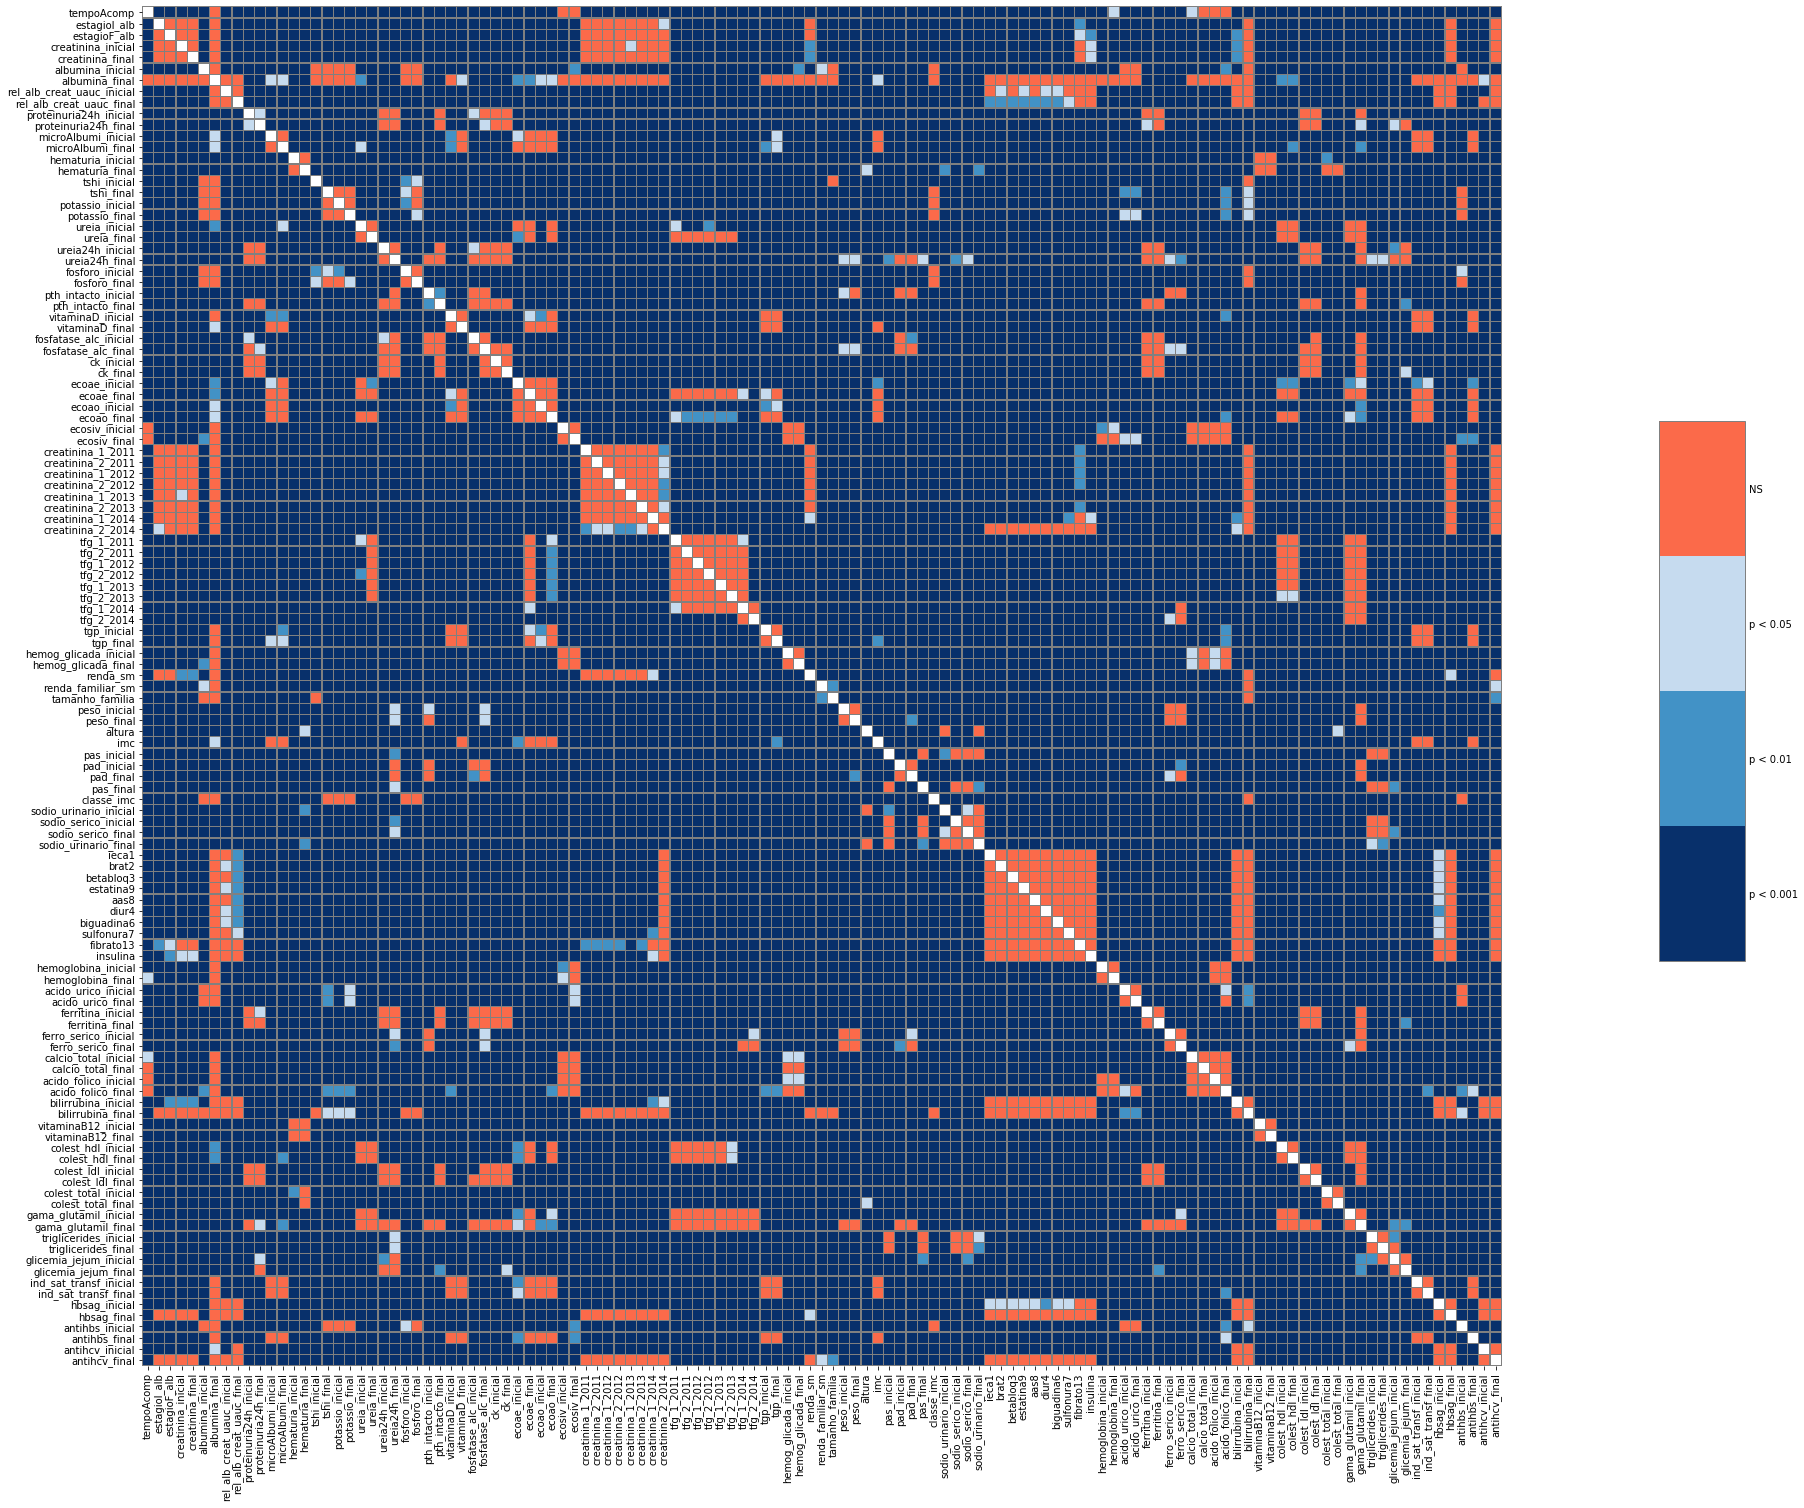

In [50]:
#testando com o exemplo do scikit documentação e com p-ajust diferente
test = [*args]
fig = plt.figure(figsize=(30,25))
p_ajust_aux = 'fdr_by'
# df = pd.DataFrame(test)
df = sp.posthoc_dunn(test, p_adjust = p_ajust_aux)

new = dic_snulo.keys()
new = [*new]
old = df.keys()
old = [*old]
columns = {old[i]:new[i] for i in range(len(df.keys()))}
index = {old[i]:new[i] for i in range(len(df.keys()))}
df=df.rename(columns,index)

# Format: diagonal, non-significant, p<0.001, p<0.01, p<0.05
cmap = ['1', '#fb6a4a', '#08306b', '#4292c6', '#c6dbef']
heatmap_args = {'cmap': cmap, 'linewidths': 0.25, 'linecolor': '0.5', 'clip_on':False, 'square': True, 'cbar_ax_bbox': [0.90, 0.35, 0.04, 0.3]}
sp.sign_plot(df, **heatmap_args)
plt.savefig('121por121_'+p_ajust_aux+'.png')



/home/gabic9814/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: FutureWarning: Interpreting call
	'.rename(a, b)' as 
	'.rename(index=a, columns=b)'.
Use named arguments to remove any ambiguity. In the future, using positional arguments for 'index' or 'columns' will raise  a 'TypeError'.
/home/gabic9814/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Interpreting call
	'.rename(a, b)' as 
	'.rename(index=a, columns=b)'.
Use named arguments to remove any ambiguity. In the future, using positional arguments for 'index' or 'columns' will raise  a 'TypeError'.
/home/gabic9814/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:80: FutureWarning: Interpreting call
	'.rename(a, b)' as 
	'.rename(index=a, columns=b)'.
Use named arguments to remove any ambiguity. In the future, using positional arguments for 'index' or 'columns' will raise  a 'TypeError'.
/home/gabic9814/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:84: Futur

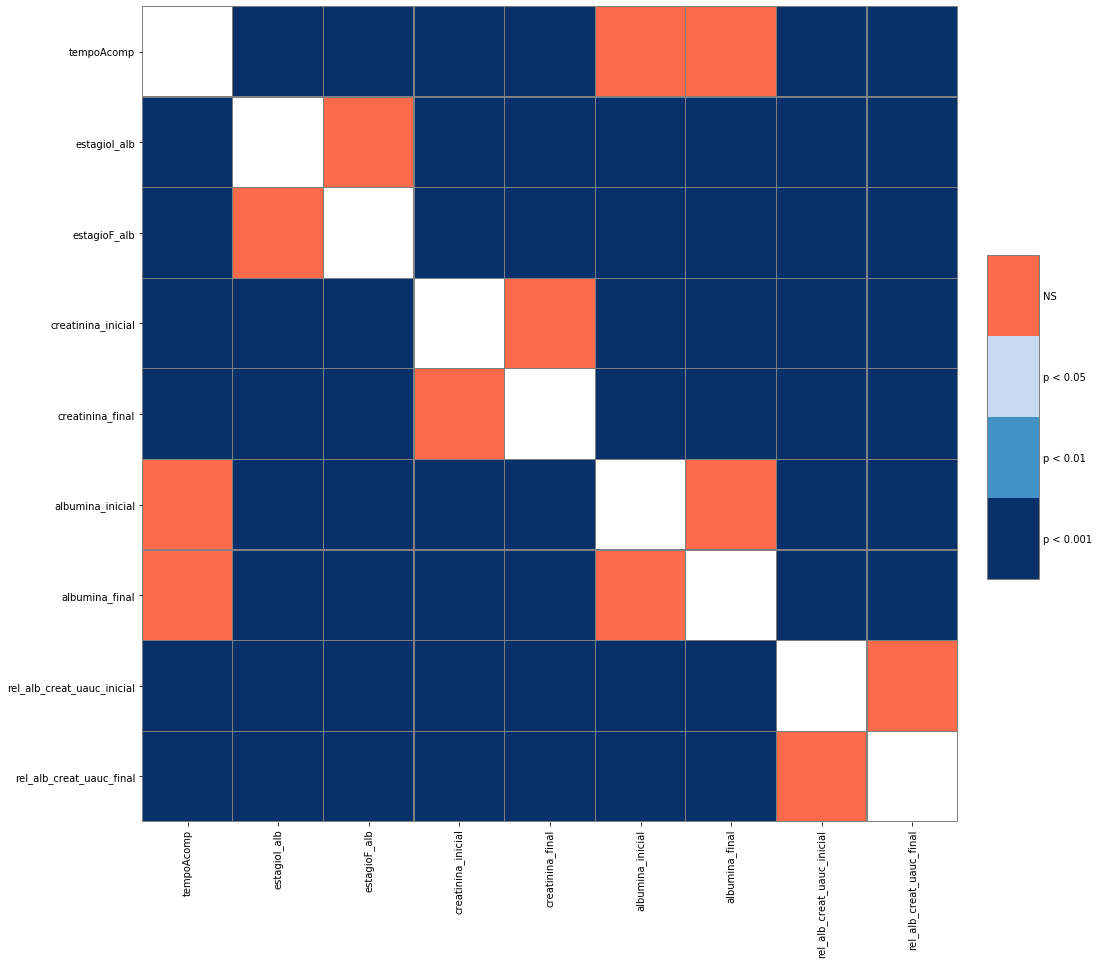

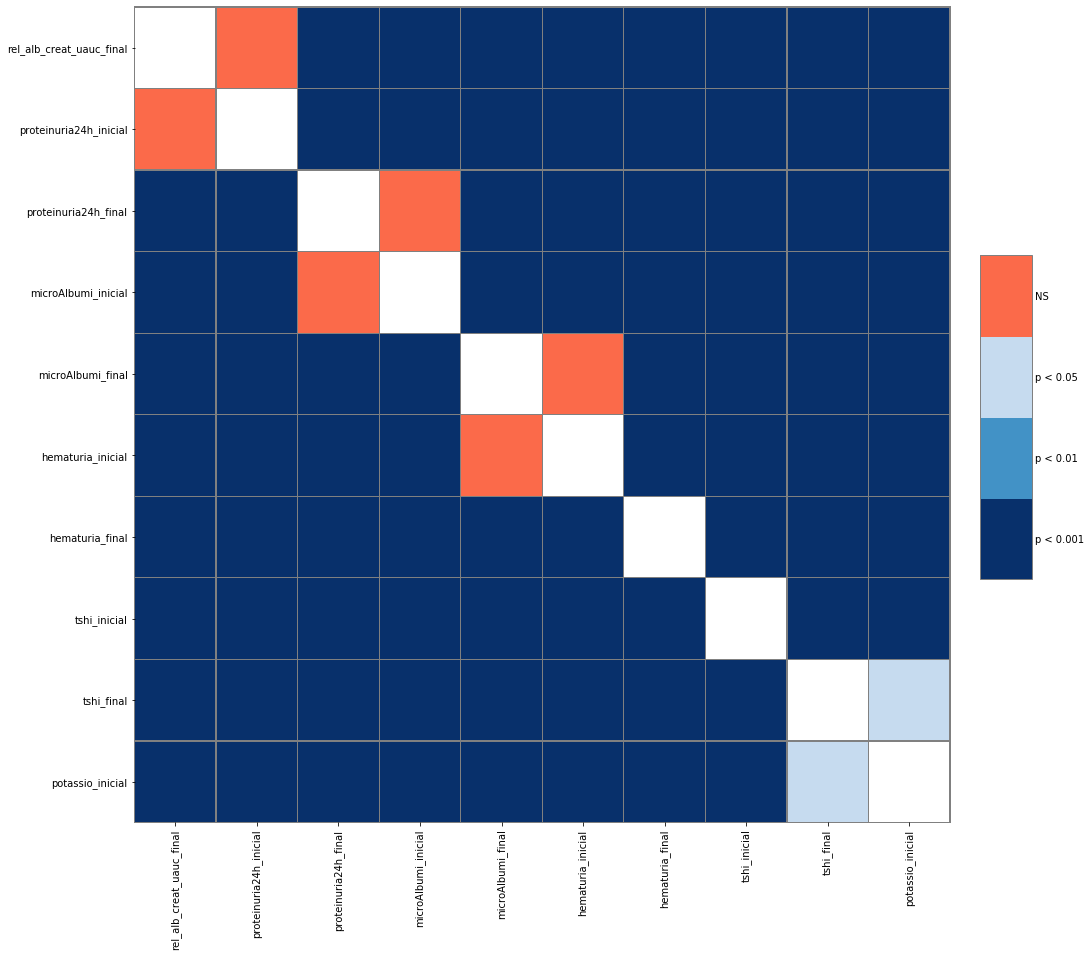

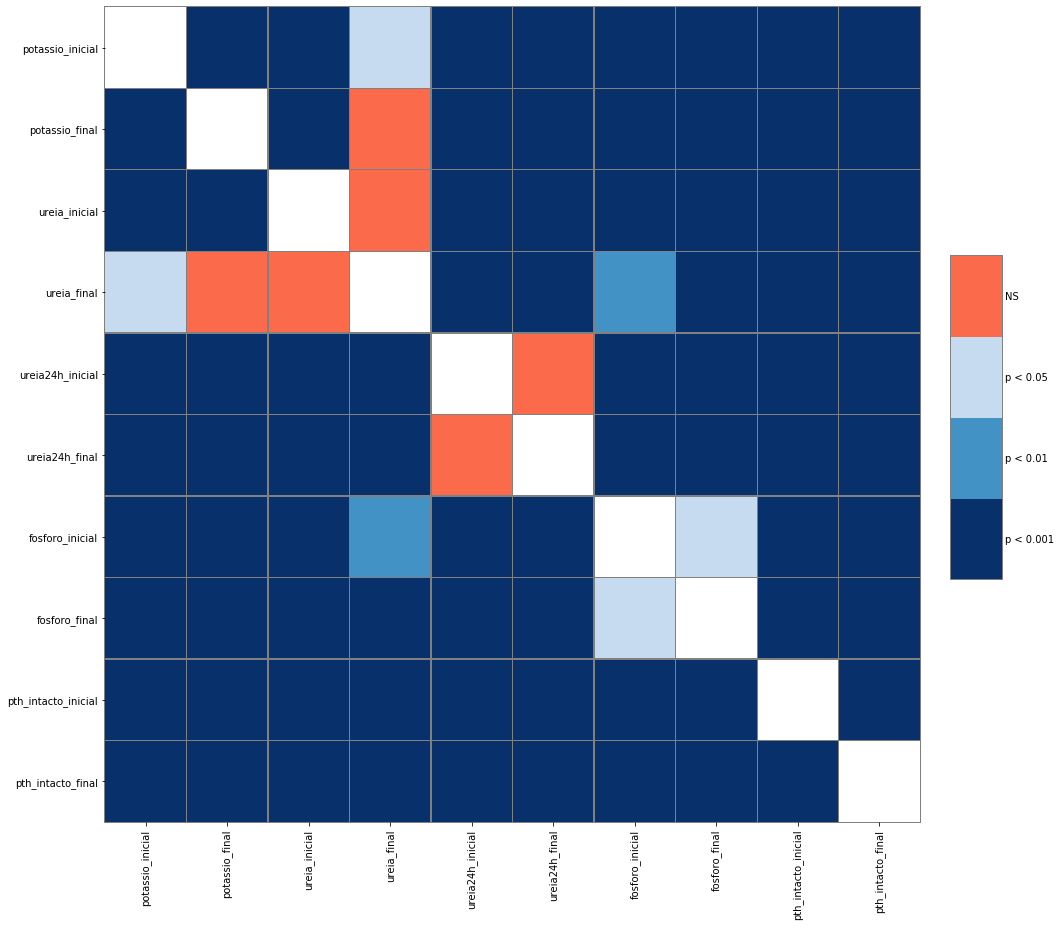

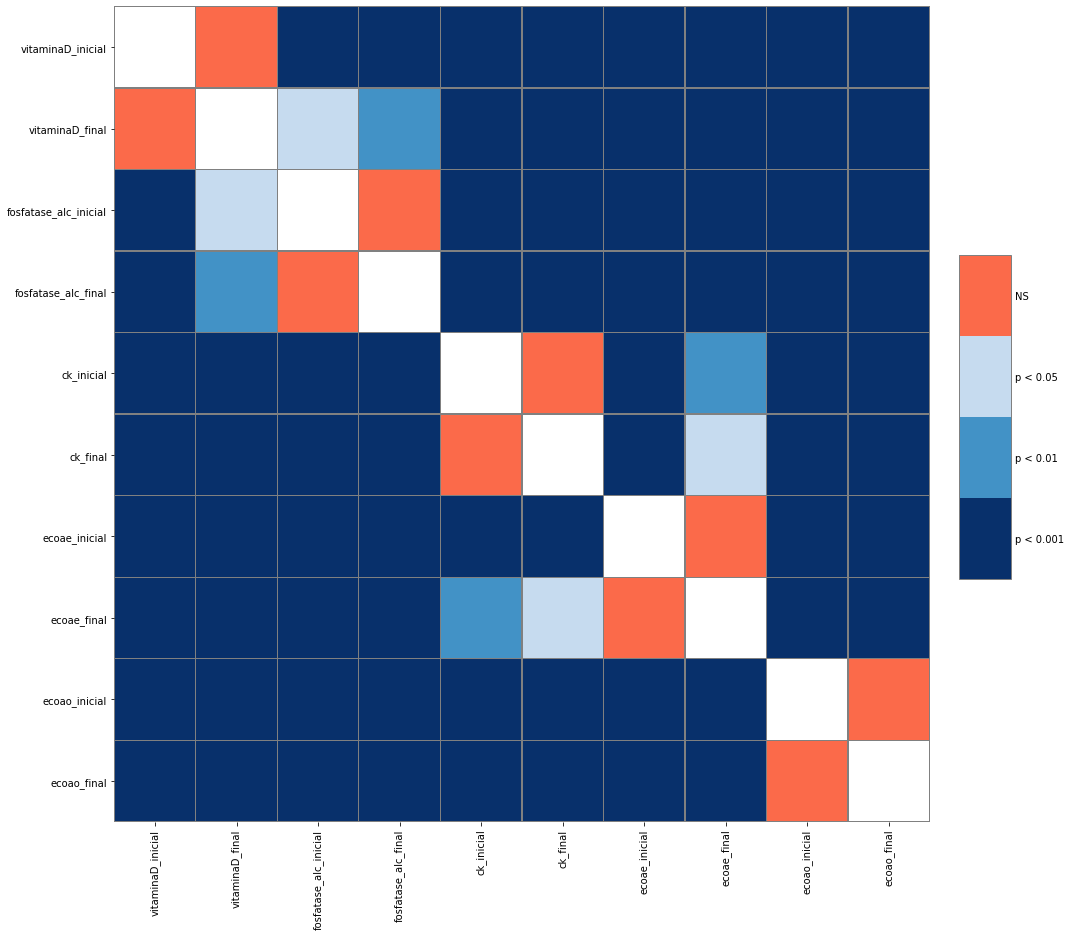

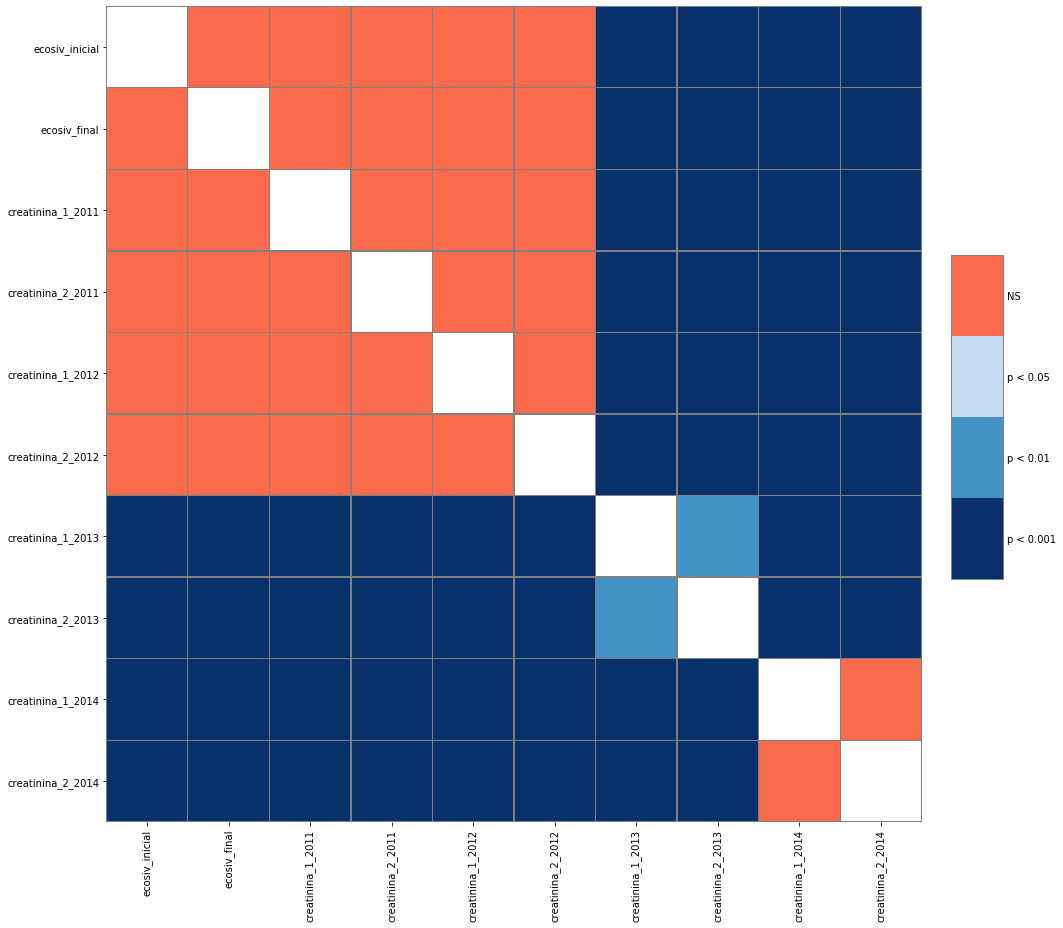

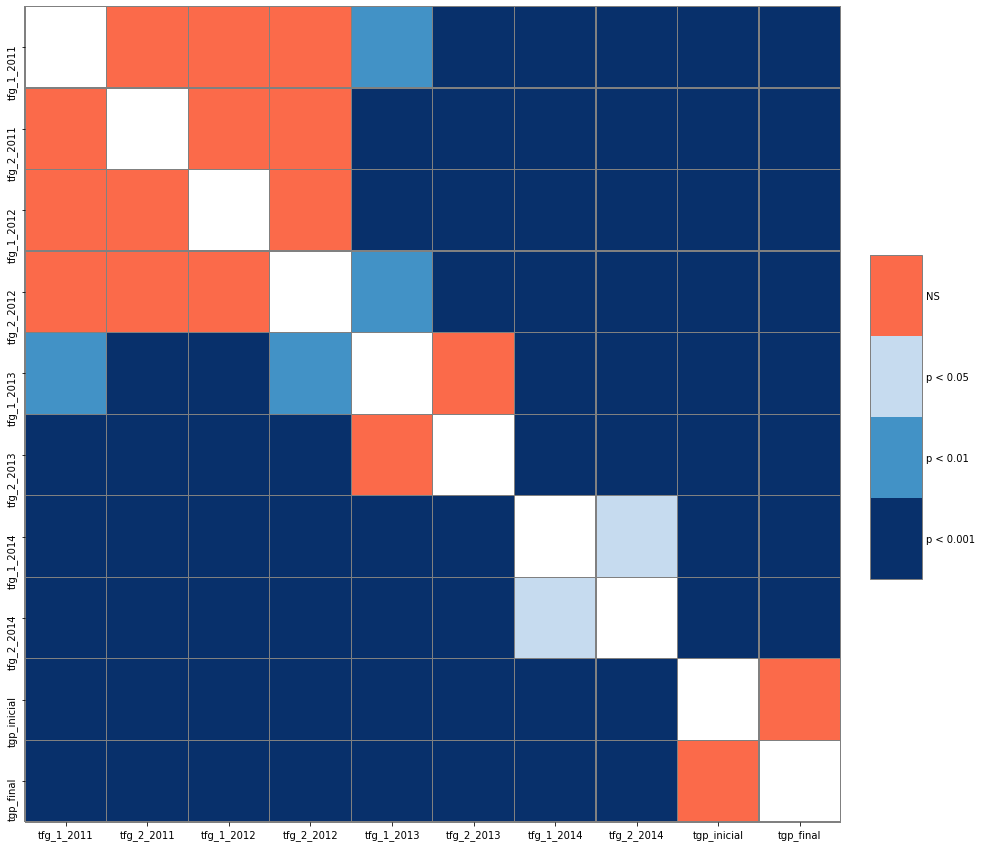

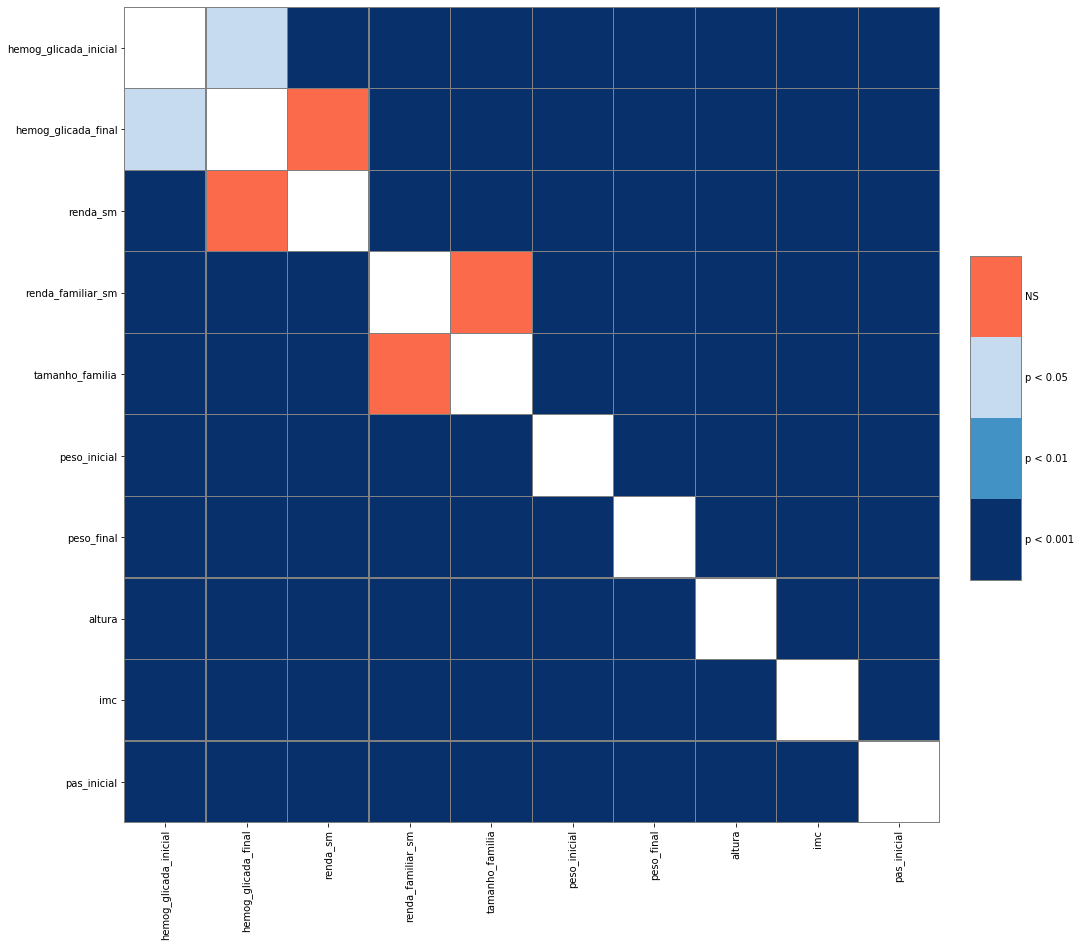

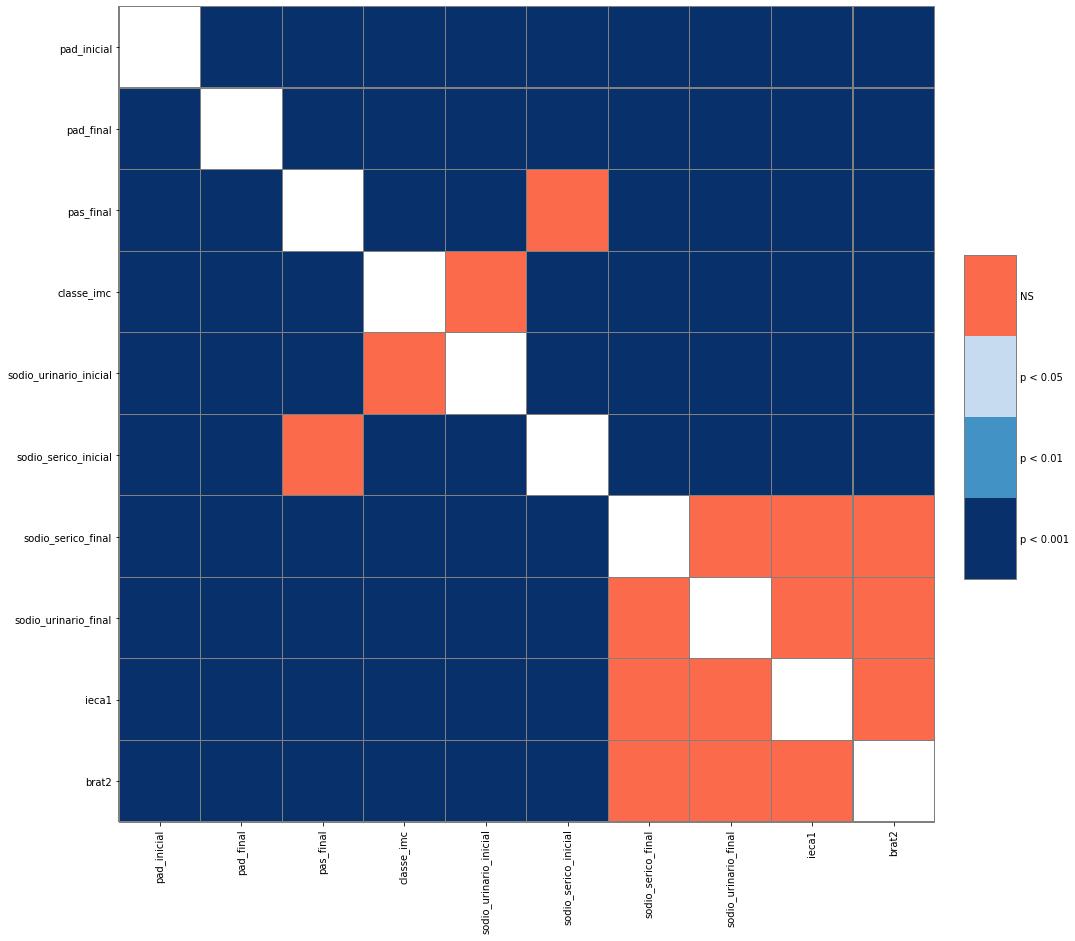

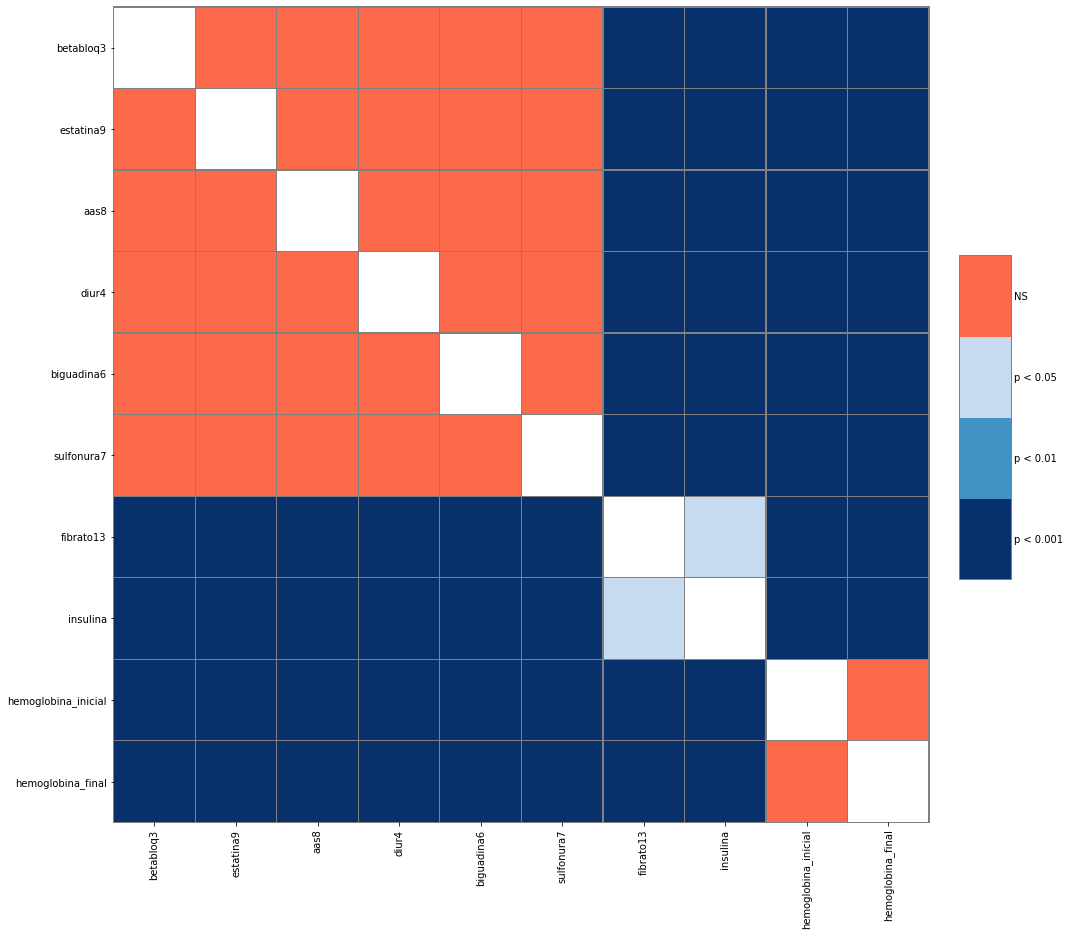

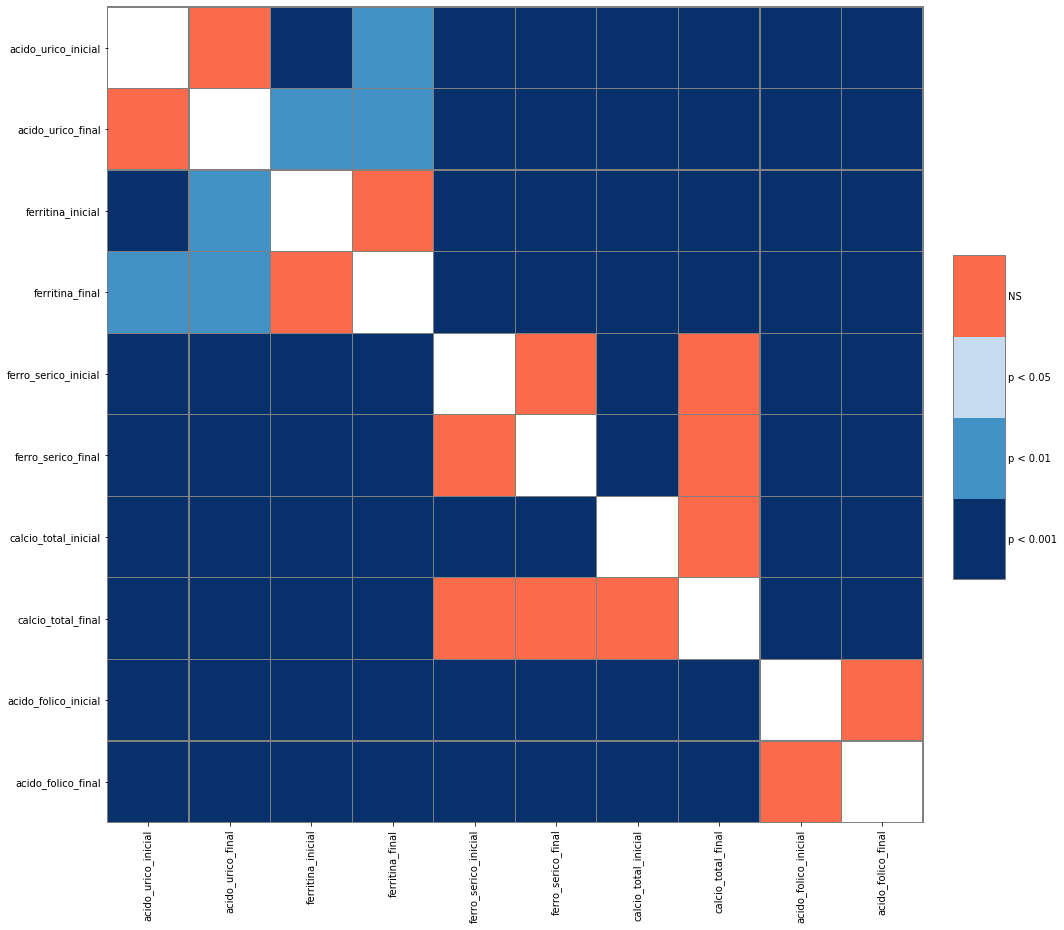

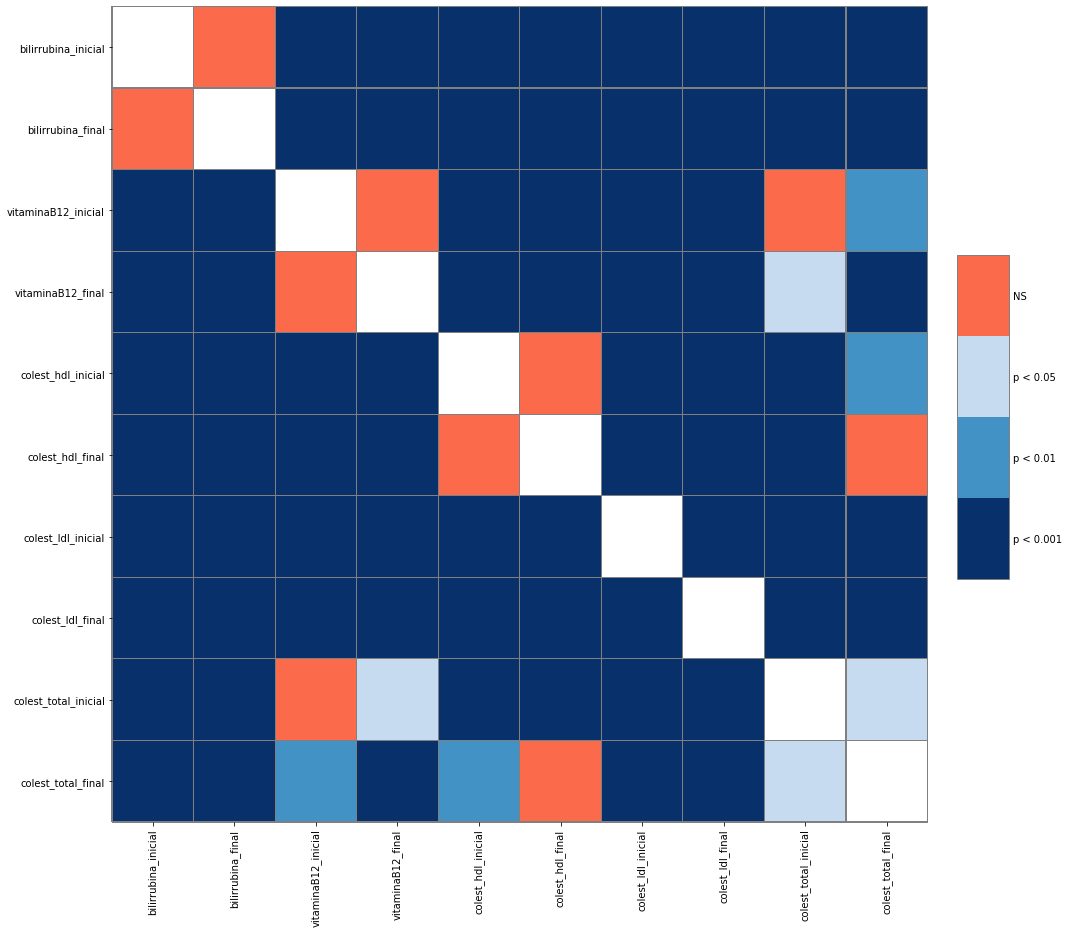

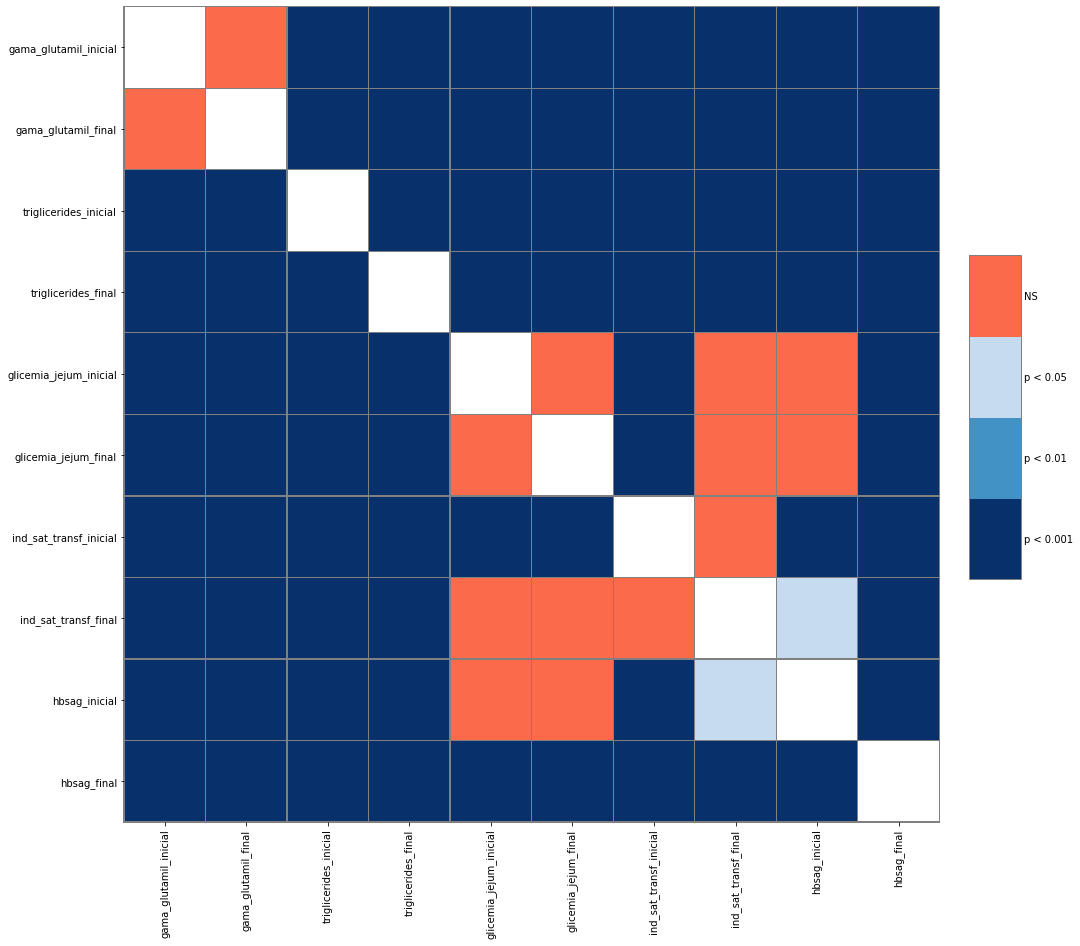

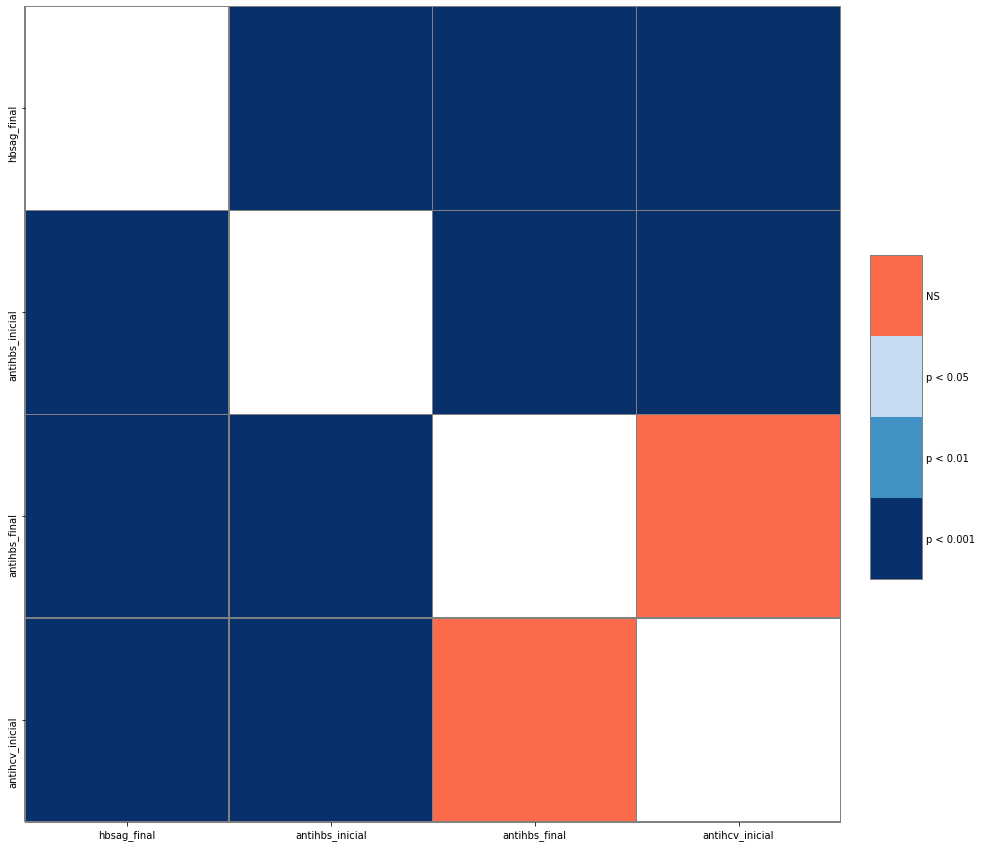

In [51]:
# Separar os grupos e fazer os calculos
dic_aux = list(dic_snulo.keys())
aux_cont = 0
aux_parada = 0
coluna = [(k, v) for k, v in columns.items()]
indice = [(k, v) for k, v in index.items()]
p_ajust_aux = 'fdr_by'

for i in range(len(dic_snulo.keys())):
    if aux_cont == 9:
        fig = plt.figure(figsize=(18,15))
        df = sp.posthoc_dunn(test[aux_parada:i],p_adjust = p_ajust_aux)
        
    #corrigindo o indice do df
        old = df.keys()
        old = [*old]
        
        new = [c for c in range(aux_parada,len(df.keys())+aux_parada)]
        
        if aux_parada==0:
            old = df.keys()
            old = [*old]
            new = [c for c in range(aux_parada,len(df.keys())+aux_parada)]
            del(new[0])
            new.append(aux_cont+aux_parada)
        elif aux_parada == aux_cont:
            old = df.keys()
            old = [*old]
            new = [c for c in range(aux_parada,len(df.keys())+aux_parada)]
        else:
            old = df.keys()
            old = [*old]
            old.append(aux_parada-1) 
            old = sorted(old)
            new = [c for c in range(aux_parada-1,len(df.keys())+aux_parada)]
        
        columns1 = {old[aux]:new[aux] for aux in range(len(df.keys()))}
        index1 = {old[aux]:new[aux] for aux in range(len(df.keys()))}
        
        
        df=df.rename(columns1,index1)
       
    #aplicando a tupla no df com indices corrigidos
        if aux_parada==0:
            columns = {a:b for a,b in coluna[aux_parada:aux_parada+aux_cont]}
            index = {a:b for a,b in indice[aux_parada:aux_parada+aux_cont]}
        elif aux_parada == aux_cont:
            columns = {a:b for a,b in coluna[aux_parada-1:aux_parada+aux_cont]}
            index = {a:b for a,b in indice[aux_parada-1:aux_parada+aux_cont]}
        else:
            columns = {a:b for a,b in coluna[aux_parada-2:aux_parada+aux_cont]}
            index = {a:b for a,b in indice[aux_parada-2:aux_parada+aux_cont]}
        
        df=df.rename(columns,index)
        

        # Format: diagonal, non-significant, p<0.001, p<0.01, p<0.05
        cmap = ['1', '#fb6a4a', '#08306b', '#4292c6', '#c6dbef']
        heatmap_args = {'cmap': cmap, 'linewidths': 0.25, 'linecolor': '0.5', 'clip_on':False, 'square': True, 'cbar_ax_bbox': [0.85, 0.35, 0.04, 0.3]}
        sp.sign_plot(df, **heatmap_args)
        
        plt.savefig('de'+str(aux_parada)+'parte'+str(i)+'_'+p_ajust_aux+'.png')
        
        aux_parada = i
        aux_cont =0
    elif i!=120:
        aux_cont += 1
    else:
        
        fig = plt.figure(figsize=(18,15))
        df = sp.posthoc_dunn(test[117:121],p_adjust = p_ajust_aux)
        #corrigindo o indice do df
        old = df.keys()
        old = [*old]
        new = [c for c in range(117,121)]
        columns1 = {old[aux]:new[aux] for aux in range(len(new))}
        index1 = {old[aux]:new[aux] for aux in range(len(new))}
        
        
        df=df.rename(columns1,index1)
        
        columns = {a:b for a,b in coluna[117-1:121]}
        index = {a:b for a,b in indice[117-1:121]}
        df=df.rename(columns,index)

        # Format: diagonal, non-significant, p<0.001, p<0.01, p<0.05
        cmap = ['1', '#fb6a4a', '#08306b', '#4292c6', '#c6dbef']
        heatmap_args = {'cmap': cmap, 'linewidths': 0.25, 'linecolor': '0.5', 'clip_on':False, 'square': True, 'cbar_ax_bbox': [0.85, 0.35, 0.04, 0.3]}
        sp.sign_plot(df, **heatmap_args)

        plt.savefig('de'+str(117)+'parte'+str(121)+'_'+p_ajust_aux+'.png')
        
    
        
   